In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [60]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/ACT3_all.csv',index_col = 0)

In [61]:
df_ind.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,2200.0,70.0,0,3.888576,0.894671,61.019644,33.160884
1,2200.0,70.0,1,3.900333,0.901614,59.847197,33.573201
2,4000.0,30.0,0,6.859376,2.669111,19.355037,24.982889
3,4000.0,30.0,1,6.898307,2.804304,15.759158,23.755285
4,3200.0,20.0,0,8.548329,3.750855,0.887035,0.062918


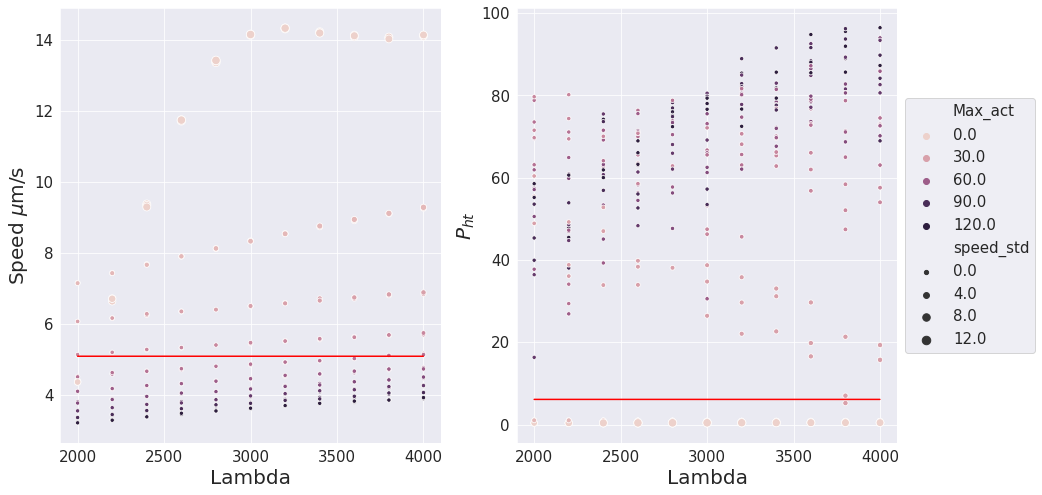

In [63]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(2000,4000),[5.10] * 2000,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 3000,c = 'r')
ax2.plot(range(2000,4000),[6.15] * 2000,c = 'r')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [52]:
def cumul_err(x):
    # unpack : 
    speed = x[0]
    uspeed = x[1]
    lspeed = x[2]
    pers = x[3]

    
    s_ = 5.104099
    p_ = 6.146018
    
    cum_err = abs(s_ - speed) + abs(s_ - uspeed) + abs(s_ - lspeed) + abs(p_ - pers)
    return cum_err

merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
293,3800.0,30.0,2,6.842717,2.735751,7.054367,13.172637,9.578469,4.106966,8.118469


In [53]:
x = merged[merged.Lambda == 3800.0]
x = x[x.Max_act == 30.]
x.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
148,3800.0,30.0,0,6.834970,2.785707,5.259984,10.551481,9.620677,4.049263,8.188320
149,3800.0,30.0,1,6.819157,2.584635,21.373098,25.116074,9.403792,4.234522,22.111408
293,3800.0,30.0,2,6.842717,2.735751,7.054367,13.172637,9.578469,4.106966,8.118469


In [57]:
# sum over same lambda max act combis
# params = pd.MultiIndex.from_frame(merged[['Lambda','Max_act']])
# merged.mean(axis = 0,level = params)
rows = []
#print(merged[['Lambda','Max_act']].to_numpy())
parameters = np.unique(merged[['Lambda','Max_act']].to_numpy(),axis = 0)
#print(parameters)
for params in parameters:
    print(params)
    x = merged[merged.Lambda == params[0]]
    x = x[x.Max_act == params[1]]
    rows.append(x.mean().to_numpy())

[2000.   10.]
[2000.   20.]
[2000.   30.]
[2000.   40.]
[2000.   50.]
[2000.   60.]
[2000.   70.]
[2000.   80.]
[2000.   90.]
[2000.  100.]
[2200.   10.]
[2200.   20.]
[2200.   30.]
[2200.   40.]
[2200.   50.]
[2200.   60.]
[2200.   70.]
[2200.   80.]
[2200.   90.]
[2200.  100.]
[2400.   10.]
[2400.   20.]
[2400.   30.]
[2400.   40.]
[2400.   50.]
[2400.   60.]
[2400.   70.]
[2400.   80.]
[2400.   90.]
[2400.  100.]
[2600.   10.]
[2600.   20.]
[2600.   30.]
[2600.   40.]
[2600.   50.]
[2600.   60.]
[2600.   70.]
[2600.   80.]
[2600.   90.]
[2600.  100.]
[2800.   10.]
[2800.   20.]
[2800.   30.]
[2800.   40.]
[2800.   50.]
[2800.   60.]
[2800.   70.]
[2800.   80.]
[2800.   90.]
[2800.  100.]
[3000.   10.]
[3000.   20.]
[3000.   30.]
[3000.   40.]
[3000.   50.]
[3000.   60.]
[3000.   70.]
[3000.   80.]
[3000.   90.]
[3000.  100.]
[3200.   10.]
[3200.   20.]
[3200.   30.]
[3200.   40.]
[3200.   50.]
[3200.   60.]
[3200.   70.]
[3200.   80.]
[3200.   90.]
[3200.  100.]
[3400.   10.]
[3400.

In [58]:
meanDF = pd.DataFrame(data = rows,columns = merged.columns)
min_err = min(meanDF.Error)
opt_params = meanDF[meanDF.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
1,2000.0,20.0,1.0,7.164359,1.898983,1.06801,0.100294,9.063342,5.265377,11.258789


In [56]:
df_ind = pd.read_csv('ANLSYS2/FITFULL/PRFDR2_all.csv',index_col = 0)
df_ind

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit
0,2000.0,0.1,0,6.894809,1.055882,98.672526,6.468152
1,2000.0,0.1,1,6.894646,1.064785,98.532746,7.255501
2,2500.0,0.5,0,7.518531,1.129965,99.893030,1.160882
3,2500.0,0.5,1,NaN,NaN,NaN,NaN
4,1000.0,0.2,0,5.113084,0.913311,64.492562,29.418656
...,...,...,...,...,...,...,...
106,1500.0,0.3,2,6.210763,0.969792,97.865841,8.842420
107,3000.0,0.3,2,7.899316,1.216880,98.148688,5.661776
108,2500.0,1.0,2,5.507279,1.497208,100.000000,0.000000
109,1500.0,0.2,2,6.184768,0.970093,90.972988,13.204124


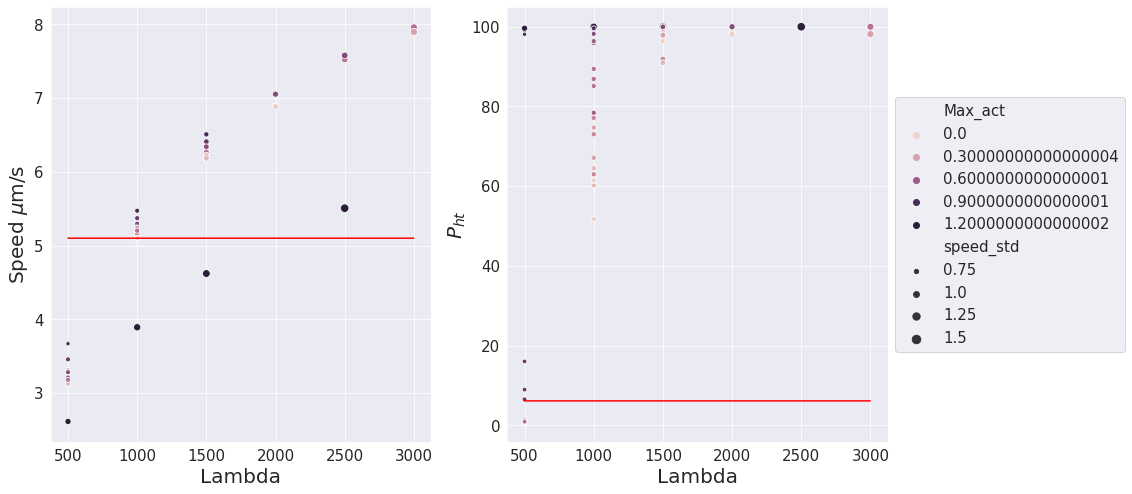

In [8]:
# Plot
# lambda vs speed,persist
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(x = 'Lambda',y = 'speed', hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax1,legend = False)
sns.scatterplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',size = 'speed_std',data = df_ind, ax = ax2, legend = 'brief')
#sns.scatterplot(x = 'Lambda',y = 'pooled_pers',hue = 'Max_act',data = ZOOM_act, ax = ax3, legend = 'full')

#sns.lineplot(x = 'Lambda',y = 'speed', hue = 'Max_act',data = ZOOM_prfdr, ax = ax1,legend = 'full')
#sns.lineplot(x = 'Lambda',y = 'persistance',hue = 'Max_act',data = ZOOM_prfdr, ax = ax2, legend = 'full')
ax1.plot(range(500,3000),[5.10] * 2500,c = 'r')
# ax2.plot(range(0,3000),[3.84] * 2500,c = 'r')
ax2.plot(range(500,3000),[6.15] * 2500,c = 'r')
ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)
# ax1.legend(fontsize = 15)
ax2.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.show()

In [9]:
merged = df_ind
merged['upper_speed'] = merged.speed + merged.speed_std
merged['lower_speed'] = merged.speed - merged.speed_std

merged['Error'] = merged[['speed','upper_speed','lower_speed','persistance']].apply(cumul_err,axis = 1)
# find minumum :
min_err = min(merged.Error)
opt_params = merged[merged.Error == min_err]#[['Lambda','Max_act','Error']]
opt_params.head()

,Lambda,Max_act,iter,speed,speed_std,persistance,std_persit,upper_speed,lower_speed,Error
99,500.0,0.8,2,3.455521,0.854581,6.523871,12.259097,4.310103,2.60094,5.323585
